## 结果评估

当评估机器学习模型的性能时，我们通常依赖于多个评价指标来全面了解模型在不同方面的表现。这些评价指标可以提供模型的准确性、稳定性、泛化能力等方面的信息。以下是常用的模型评估指标的简要介绍：

- **准确率 (Accuracy)**:
   - 准确率是分类任务中最常用的评价指标，它表示模型正确分类的样本数占总样本数的比例。计算公式为：$$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} $$

- **精度 (Precision)**:
   - 精度是指模型在所有预测为正类的样本中，真正是正类的样本占比。计算公式为：$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$

- **召回率 (Recall)**:
   - 召回率是指所有真正为正类的样本中，被模型正确预测为正类的样本占比。计算公式为：$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

- **F1分数 (F1 Score)**:
   - F1分数是精度和召回率的调和平均值，可以综合评估模型的性能。计算公式为：$$ \text{F1 Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

- **ROC曲线 (Receiver Operating Characteristic curve)**:
   - ROC曲线是用于衡量二分类模型性能的图形指标。它以假阳率（False Positive Rate）为横轴，真阳率（True Positive Rate，即召回率）为纵轴，绘制出分类阈值的变化对模型性能的影响。曲线下的面积AUC（Area Under the Curve）用来量化模型的性能，AUC越大，模型性能越好。

这些评价指标可以帮助你了解模型的分类性能，根据实际情况选择合适的评价指标进行模型评估和比较。同时，不同的任务可能需要侧重不同的指标，例如对于一些不平衡的分类问题，可能更关注精度、召回率等指标。

1. 导入库:

你首先导入了所需的库，包括 joblib 用于保存和加载模型，以及绘制图形的 matplotlib 和一些评价指标函数。

In [17]:
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_curve, auc

2. 加载数据:

从保存的文件中加载训练集、测试集。

In [18]:
# 加载保存的训练集和测试集
X_train = joblib.load('./data/X_train.joblib')
X_test = joblib.load('./data/X_test.joblib')
y_train = joblib.load('./data/y_train.joblib')
y_test = joblib.load('./data/y_test.joblib')

3. 模型评估:

遍历了所有保存的分类器，对每个分类器进行如下操作：
预测测试集并计算评价指标如准确率、F1分数、召回率和精度。
保存绘制 ROC 曲线所需要的值。

In [19]:
accuracy_values = []
f1_values = []
recall_values = []
precision_values = []
roc_curves = []
report_dict_list = []

classifiers = [
    'Support Vector Machine',
    'Logistic Regression',
    'Decision Tree', 
    'Random Forest',
    'Naive Bayes',
    'K-Nearest Neighbors'
]

for name in classifiers:
    clf = joblib.load(f'./model/{name}.joblib')
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]
    
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob)
    roc_curves.append((fpr_logreg, tpr_logreg, name))

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy_values.append(accuracy)
    f1_values.append(f1)
    recall_values.append(recall)
    precision_values.append(precision)

    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print()

Classifier: Support Vector Machine
Accuracy: 0.75
F1 Score: 0.75
Recall: 0.75
Precision: 0.80

Classifier: Logistic Regression
Accuracy: 0.76
F1 Score: 0.75
Recall: 0.76
Precision: 0.84

Classifier: Decision Tree
Accuracy: 0.68
F1 Score: 0.68
Recall: 0.68
Precision: 0.68

Classifier: Random Forest
Accuracy: 0.76
F1 Score: 0.76
Recall: 0.76
Precision: 0.77

Classifier: Naive Bayes
Accuracy: 0.67
F1 Score: 0.64
Recall: 0.67
Precision: 0.78

Classifier: K-Nearest Neighbors
Accuracy: 0.72
F1 Score: 0.72
Recall: 0.72
Precision: 0.72



4. 可视化各个常用分类算法在机器人分类任务中Accuracy、Precision、Recall、F1-score的值

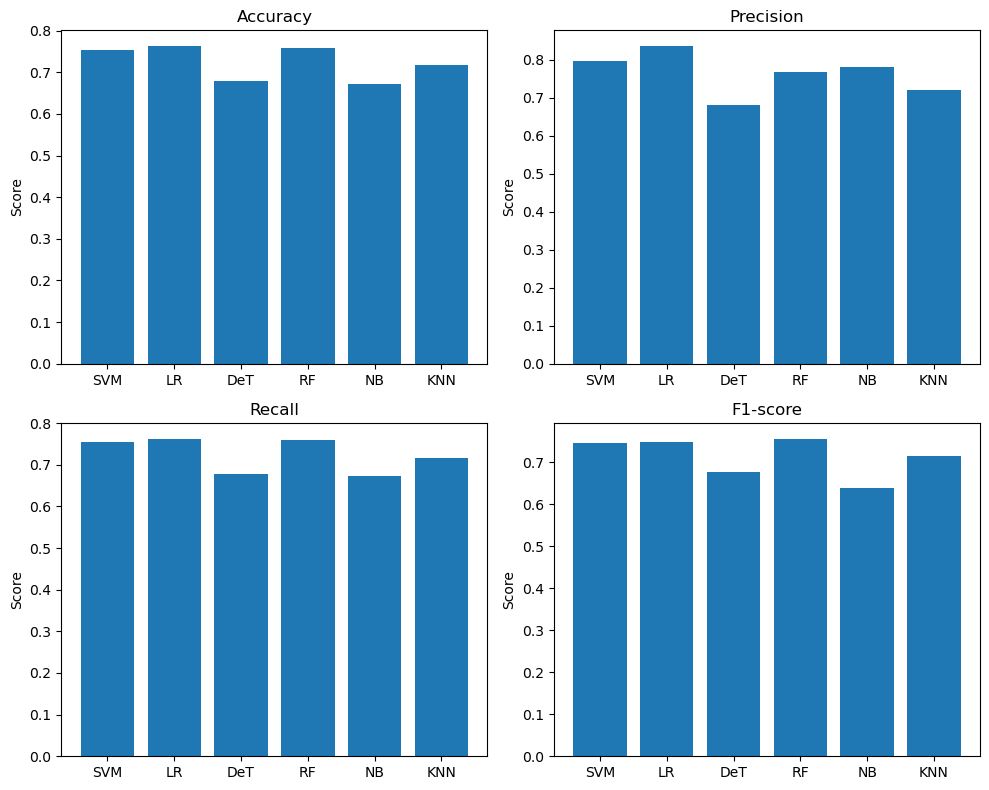

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 假设你有四个算法的准确率、精度、召回率和F1分数
algo_names = ['SVM', 'LR', 'DeT', 'RF', 'NB', 'KNN']

# 设置图形的排列方式
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 绘制每种指标的条形图
axs[0, 0].bar(algo_names, accuracy_values)
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylabel('Score')

axs[0, 1].bar(algo_names, precision_values)
axs[0, 1].set_title('Precision')
axs[0, 1].set_ylabel('Score')

axs[1, 0].bar(algo_names, recall_values)
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylabel('Score')

axs[1, 1].bar(algo_names, f1_values)
axs[1, 1].set_title('F1-score')
axs[1, 1].set_ylabel('Score')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

根据各个算法对应的准确率（`accuracy`）、F1分数（`f1-score`）、召回率（`recall`）、精度（`precision`），我们可以进行一些简单的分析和比较。


| Algorithm              | Accuracy   | F1 Score   | Recall    | Precision |
|------------------------|------------|------------|-----------|-----------|
| SVM                    | 0.754      | 0.745      | 0.754     | 0.798     |
| Logistic Regression    | 0.763      | 0.749      | 0.763     | 0.836     |
| Decision Tree          | 0.679      | 0.678      | 0.679     | 0.680     |
| Random Forest          | 0.758      | 0.757      | 0.758     | 0.767     |
| Naive Bayes            | 0.672      | 0.638      | 0.672     | 0.782     |
| K-Nearest Neighbors    | 0.716      | 0.715      | 0.716     | 0.720     |


- **准确率 (Accuracy)**:
  - 准确率最高的模型是 Logistic Regression，其次是 Random Forest。这表示 Logistic Regression 和 Random Forest 在正确分类样本方面表现较好。


- **召回率 (Recall)**:
  - 召回率最高的模型是 Logistic Regression，其次是 SVM 和 Random Forest。召回率表示模型正确识别真正为正类的样本比例。


- **精度 (Precision)**:
  - 精度最高的模型是 Logistic Regression，其次是 Random Forest 和 Naive Bayes。精度表示在预测为正类的样本中，真正为正类的样本比例。


- **F1分数 (F1 Score)**:
  - F1分数综合了模型的精度和召回率。与准确率类似，Logistic Regression 的 F1 分数最高，其次是 Random Forest。



综合来看，Logistic Regression 和 Random Forest 在这些指标中表现较好，可以考虑作为本问题的首选模型。但选择最适合问题的模型还取决于问题的特性、数据集的大小、计算资源等其他因素。

4. roc图

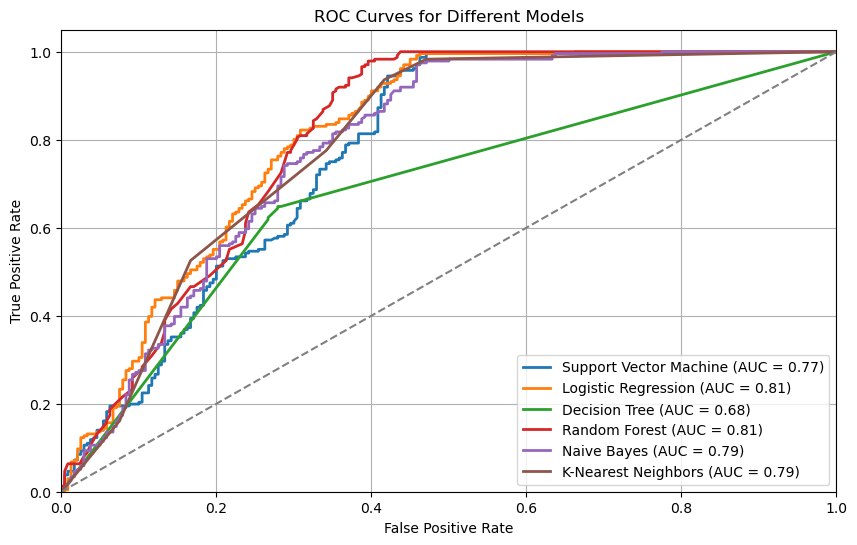

In [21]:
plt.figure(figsize=(10, 6))
for fpr, tpr, model in roc_curves:
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

当我们观察这些ROC曲线时，可以得出以下结论：

1. **支持向量机 (SVM)**: ROC曲线展现了不同阈值下的良好性能，AUC为0.77，表明模型能够高效地区分正负样本。

2. **逻辑回归 (Logistic Regression)**: 该模型的ROC曲线也非常接近理想状态，AUCAUC为0.81接近1，模型能够高效地分类。

3. **决策树 (Decision Tree)**: ROC曲线表现良好，但表现并不如其他算法，AUC在0.68。

4. **随机森林 (Random Forest)**: ROC曲线接近理想状态，AUC为0.81接近1，表明模型能够高效地进行分类。

4. **朴素贝叶斯 (Naive Bayes)**: ROC曲线接近理想状态，AUC为0.79，模型能够高效地分类。

6. **K近邻 (K-Nearest Neighbors)**: ROC曲线也表现良好，AUC为0.79，模型能够高效地分类。

总体来说，所有模型的ROC曲线都表现出色，AUC接近1，这意味着它们在区分正负样本方面都具有很高的性能。在这些模型中，逻辑回归、随机森林和支持向量机略微优于其他模型，因为它们的AUC值更加接近1。